In [1]:
# from llm_workflow.openai import OpenAIChat

# model = OpenAIChat()

# model("hello")

In [2]:
import yaml
from source.library.notes import ClassNotes


with open("../../tests/test_files/notes1.yaml", "r") as f:
    notes = yaml.safe_load(f)

class_notes = ClassNotes.from_dict(notes)
print(class_notes)

uuid='65A67658-8B85-41CF-8FCF-1A1D46F61690' subject_metadata={'category': 'OMSCS', 'ident': 'CS 6200', 'name': 'Graduate Introduction to Operating Systems', 'abbreviation': 'GIOS'} note_metadata={'source': "Beej's Guide to Network Programming", 'url': 'https://beej.us/guide/bgnet/pdf/bgnet_usl_c_1.pdf', 'tags': ['systems', 'c', 'networking']} notes=[DefinitionNote(priority=<Priority.medium: 'medium'>, reference=None, tags=[], term='What is a **socket**?', definition='A way to speak to other programs using standard Unix file descriptors.'), DefinitionNote(priority=<Priority.medium: 'medium'>, reference=None, tags=[], term='What is a file descriptor?', definition="An integer associated with an open file. But (and here's the catch), that file can be a `network connection`, a `FIFO`, a `pipe`, a `terminal`, a real on-the-disk `file`, or just about anything else.  Everything in Unix *is* a file.\n\nA file descriptor is a **small, non-negative integer** that a Unix or Unix-like operating sys

In [3]:
from source.library.notes import TestBank

test = TestBank([class_notes])
draw = test.draw()
draw

{'history': History(correct=0, incorrect=0),
 'subject_metadata': {'category': 'OMSCS',
  'ident': 'CS 6200',
  'name': 'Graduate Introduction to Operating Systems',
  'abbreviation': 'GIOS'},
 'note_metadata': {'source': "Beej's Guide to Network Programming",
  'url': 'https://beej.us/guide/bgnet/pdf/bgnet_usl_c_1.pdf',
  'tags': ['systems', 'c', 'networking']},
 'note': DefinitionNote(priority=<Priority.medium: 'medium'>, reference=None, tags=[], term='What is a file descriptor?', definition="An integer associated with an open file. But (and here's the catch), that file can be a `network connection`, a `FIFO`, a `pipe`, a `terminal`, a real on-the-disk `file`, or just about anything else.  Everything in Unix *is* a file.\n\nA file descriptor is a **small, non-negative integer** that a Unix or Unix-like operating system uses as a handle to access a file or other input/output resources, such as pipes and network sockets. (ChatGPT)")}

In [4]:
draw['history'].correct_answer(True)

In [5]:

test.get_history()

{'65A67658-8B85-41CF-8FCF-1A1D46F616901543924218491714636': History(correct=0, incorrect=0),
 '65A67658-8B85-41CF-8FCF-1A1D46F616907282420723014782182': History(correct=1, incorrect=0),
 '65A67658-8B85-41CF-8FCF-1A1D46F616901290987507323175295': History(correct=0, incorrect=0)}

(0.0, 1.0)

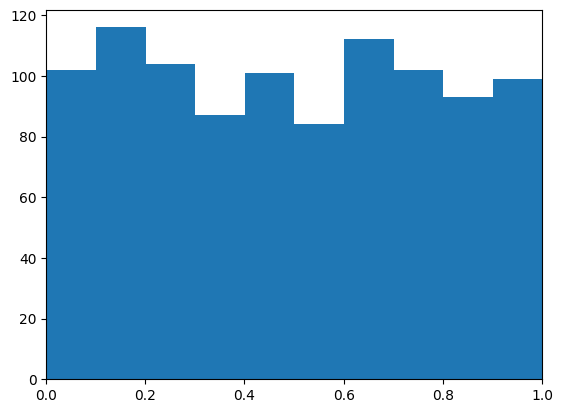

In [6]:
# use beta distribution to draw notes
import numpy as np
import matplotlib.pyplot as plt

# beta distribution
correct, wrong = 0, 0
# beta is the distribution of the probability of success
beta = np.random.beta(correct + 1, wrong + 1, 1000)
# if the probability of success (of answering the question) is high, then there is less need to study it and we can draw it less often
beta = 1 - beta
plt.hist(beta, bins=10)
# fix the x-axis between 0 and 1
plt.xlim(0, 1)